# Load Packages

In [5]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

# Load and Prepare Data

In [6]:
data = pd.read_csv("../../data/processed/training_numeric_cleaned.csv", sep="\t")

X = data.drop(columns=["ActualTOW"])
y = data["ActualTOW"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = X.select_dtypes(include=["object"]).columns.tolist()

numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, num_features),
    ("cat", categorical_transformer, cat_features)
])

# Model definition

In [7]:
model = DecisionTreeRegressor(max_depth=10, random_state=42)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f} | MAE: {mae:.2f}")

RMSE: 1008.24 | MAE: 739.57


# Plot prediction vs true

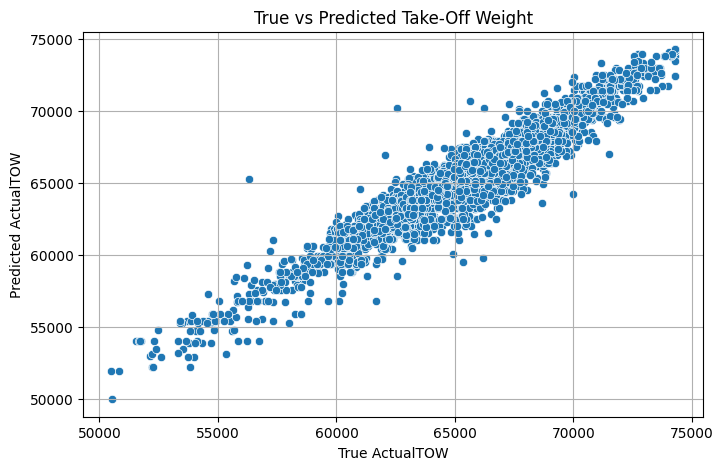

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True ActualTOW")
plt.ylabel("Predicted ActualTOW")
plt.title("True vs Predicted Take-Off Weight")
plt.grid(True)
plt.show()
